# Inequality 

Income inequality is a relevant issue that often comes up in the news. Today, we'll go over measurements of inequality, trends in income inequality in the US, and compare income inequality measures across countries. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datascience import *
plt.style.use('seaborn-muted')

## Measurements of Inequality

### The Lorenz Curve
The Lorenz Curve visually presents income inequality by plotting household percentile on the X-axis, and the cumulative income share that the bottom x percentile own on the Y-axis. The households are sorted by income, so that the first household at the 0th percentile has the least amount of income, while the household at the 100th percentile has the greatest income.

For example, if the X-axis reads 0.30 and Y-axis reads 0.10, then it means that the bottom 30% of the population received 10% of the total population's income.


This yields 2 implications for the Lorenz Curve:
- The point (0,0) and (1,1) is always on the curve. (0,0) represents the 0% of the population owning 0% of the income, and (1,1) represents 100% of the population owning 100% of the income.
- The slope is always increasing. This is because households are sorted by income as percentiles: for a slight increase in x, households become richer and hence provide a larger share of total income.

#### Line of Perfect Equality
In a world of perfect equality, everyone would have the exact same income. In this scenario, the Lorenz curve would just be a 45-degree straight line that runs through (0,0) and (1,1), i.e. $y=x$. Mathematically, this is because the derivative is constant: for a slight increase in x, the total share of income increases at a constant rate. Another way to think about this is that the bottom 10% of the population will own 10% of the total income, the bottom 50% of the population will own 50% of the total income, and so on. This line is known as the line of perfect equality.

#### A Toy Example
Let's suppose a country has the following income distribution: 
- The bottom 10% owns a cumulative 2% of total income 
- The bottom 20% owns 5% of total income
- The bottom 30% owns 9% of total income
- The bottom 40% owns 15% of total income 
- The bottom 50% owns 23% of total income
- The bottom 60% owns 33% of total income
- The bottom 70% with 45% of total income
- The bottom 80% with 59% of total income 
- The bottom 90% with 75% of total income
- The bottom 100% with 100% of total income

We will create an array of income shares and call it `Country1`. 

In [3]:
Country1 = make_array(0, 0.02, 0.05, 0.09, 0.15, 0.23, 0.33, 0.45, 0.59, 0.75, 1.0)

To better see this information, we will create a DataFrame containing population percentage and cumulative income share. 

In [4]:
income_distribution = Table().with_columns("Population Percentage (%)", np.arange(11) * 10, 
                                            "Cumulative Income Share (%)", Country1 * 100, 
                                            "Perfect Equality Income Share (%)", np.arange(11) * 10)
income_distribution

Population Percentage (%),Cumulative Income Share (%),Perfect Equality Income Share (%)
0,0,0
10,2,10
20,5,20
30,9,30
40,15,40
50,23,50
60,33,60
70,45,70
80,59,80
90,75,90


How will the Lorenz Curve for this income distribution look like? 

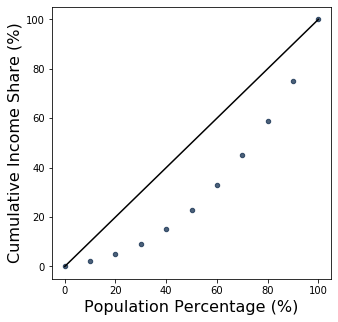

In [5]:
income_distribution.scatter(0,1)
plt.plot([0,100], [0,100], color='k')

#### Comparing Lorenz Curves
Now lets compare 2 countries' Lorenz curves. Can you tell which country has more income inequality?

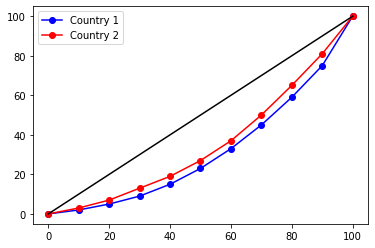

In [6]:
Country2 = make_array(0, 0.03, 0.07, 0.13, 0.19, 0.27, 0.37, 0.5, 0.65, 0.81, 1.0)
income_distribution2 = Table().with_columns("Population Percentage (%)", np.arange(11) * 10, 
                                            "Cumulative Income Share (%)", Country2 * 100, 
                                            "Perfect Equality Income Share (%)", np.arange(11) * 10)
plt.plot(income_distribution.column(0), income_distribution.column(1), "-o", c = 'b')
plt.plot(income_distribution.column(0), income_distribution2.column(1), "-o", c = 'r')
plt.legend(["Country 1", "Country 2"])
plt.plot([0,100], [0,100], color='k');

What about this one?

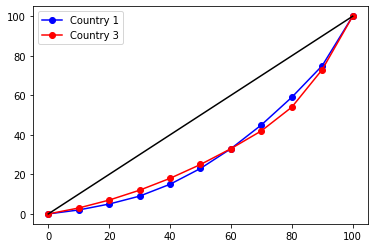

In [7]:
Country3 = make_array(0, 0.03, 0.07, 0.12, 0.18, 0.25, 0.33, 0.42, 0.54, 0.73, 1.0)
income_distribution3 = Table().with_columns("Population Percentage (%)", np.arange(11) * 10, 
                                            "Cumulative Income Share (%)", Country3 * 100, 
                                            "Perfect Equality Income Share (%)", np.arange(11) * 10)
plt.plot(income_distribution.column(0), income_distribution.column(1), "-o", c = 'b')
plt.plot(income_distribution.column(0), income_distribution3.column(1), "-o", c = 'r')
plt.legend(["Country 1", "Country 3"])
plt.plot([0,100], [0,100], color='k');

As you may see, the Lorenz curve is not able to produce a 'quantitative' measure of income inequality, making the scenario above hard for us to compare the 2 countries. For this, we turn to the Gini coefficient.

# Gini Coefficient

<img src='Gini.png' width=500px></img>

The Gini coefficient is the ratio of the area between the line of equality and the lorenz curve to the total area under the line of equality. 
$$\text{Gini} = \frac{\text{Area between line of equality and lorenz curve}}{\text{Area under line of equality}} = \frac{A}{A+B}$$

If we express the Lorenz curve as $L(x)$, we can use calculus to derive an equation for the Gini coefficient:
$$\text{Gini} = \frac{\frac{1}{2} - \int_0^1 L(x)\text{d}x}{\frac{1}{2}} = 1 - 2\int_0^1 L(x)\text{d}x$$

Intuitively, the closer the Lorenz curve is to the line of equality, the lower income inequality exists. Hence, the smaller the area of A, the lower the inequality. **Hence, this means that the smaller the Gini coefficient, the lower the income inequality.**

Note that the Gini coefficient will always be between 0 and 1.

In [8]:
# This function estimates the Gini coefficient. You don't have to understand how this code works below.
def gini(distribution):
    sorted_distribution = sorted(distribution)
    height = 0
    area = 0
    for i in sorted_distribution:
        height += i
        area += height - i / 2
    fair_area = height * len(distribution) / 2.
    return (fair_area - area) / fair_area

When we use our population as the parameter to the gini function, we get: 

In [9]:
gini_coefficient_country1 = gini(Country1)
gini_coefficient_country1

0.518628912071535

In [10]:
gini_coefficient_country2 = gini(Country2)
gini_coefficient_country2

0.48756218905472637

In [11]:
gini_coefficient_country3 = gini(Country3)
gini_coefficient_country3

0.4934357195937577

Are these values in line with our intuition from the Lorenz curves?

# Income Inequality Historically

## The United States
Let's examine historical trends of income inequality in the US over the last 100 years. The data has been collected from [The World Inequality Database](https://wid.world/), which is co-directed by Berkeley Economics professors Emanuel Saez and Gabriel Zucman.

Specifically, we will observe income distributions for the bottom 50 percent, top 10 percent, and top 1 percent.

In [13]:
us_hist = Table.read_table("US_inequality.csv")
us_hist.show(5)

Percentile,Year,Income Share
p90p100,1913,0.4231
p90p100,1914,0.4295
p90p100,1915,0.4219
p90p100,1916,0.4439
p90p100,1917,0.449


In [14]:
us_hist.take(np.arange(100,105))

Percentile,Year,Income Share
p90p100,2013,0.4632
p90p100,2014,0.4702
p0p50,1913,nan
p0p50,1914,nan
p0p50,1915,nan


Let's begin with some data cleaning: it seems like our 3 brackets are 'vertically stacked' on top of each other. Instead, we would like a table with 5 columns: `Year`, `bottom 50 percent income share`, `top 10 percent income share`, and `top 1 percent income share`.

In [15]:
bottom_50_us = us_hist.where("Percentile", "p0p50").drop("Percentile").relabeled("Income Share", "Bottom 50% Share")
top_10_us = us_hist.where("Percentile", "p90p100").drop("Percentile").relabeled("Income Share", "Top 10% Share")
top_1_us = us_hist.where("Percentile", "p99p100").drop("Percentile").relabeled("Income Share", "Top 1% Share")
us_hist_joined = bottom_50_us.join("Year", top_10_us).join("Year", top_1_us)
us_hist_joined

Year,Bottom 50% Share,Top 10% Share,Top 1% Share
1913,nan,0.4231,0.1884
1914,nan,0.4295,0.1933
1915,nan,0.4219,0.187
1916,nan,0.4439,0.2064
1917,nan,0.449,0.2014
1918,nan,0.4364,0.1895
1919,nan,0.4543,0.2101
1920,nan,0.4344,0.184
1921,nan,0.4653,0.181
1922,nan,0.4554,0.1763


Oh no, there are some nan values! NaN (Not a Number) values are very common in real life datasets: often, we may not observe some data simply because no data was collected, or perhaps the data collected was faulty. Sometimes, we can try to impute NaN values in order to not have gaps in our data, but for now let's ignore NaNs and try to plot to see what's going on:

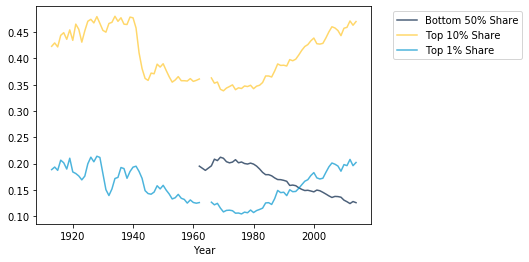

In [16]:
us_hist_joined.plot("Year")

Let's take a look at the top marginal tax rates in the United States throughout this time. Overall, the United States (and most of the rest of the world) has a progressive tax system, which means that the more income you earn, the higher % tax you will be taxed at. A good way to reduce income inequality is through progressive taxation; having the richer paying a higher portion of their income will help increase equity. Currently, the top marginal tax rate is 37%, as we can see in the table below.

<img src='MTR.png' width=500></img>

The top marginal tax rate only applies to the portion of your income above a certain income level. For example, if you earned 19501 dollars in 2019, then you will pay 1940 dollars plus 12% of $19501-19401$, i.e. 12 dollars. For another example, if you earned 80000 dollars, then you will pay $9086 + 0.22(80000-78950) = 9317$ dollars in tax, effectively a $\frac{9317}{80000} = 11.6\%$ tax rate.

In general, the idea is you will pay a lower tax rate for your first x dollars, but a higher rate for dollars earned over x.

Now with this term defined, let's observe the historical trends in marginal tax rates.

In [18]:
toptax = Table.read_table("toptaxrate.csv")
toptax

Year,Tax Rate (%)
1913,7
1914,7
1915,7
1916,15
1917,67
1918,77
1919,73
1920,73
1921,73
1922,58


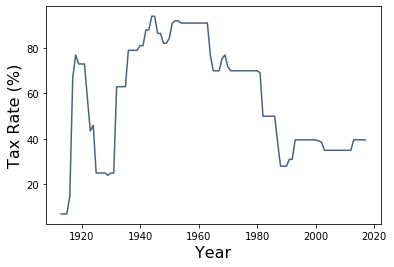

In [19]:
toptax.plot(0,1)

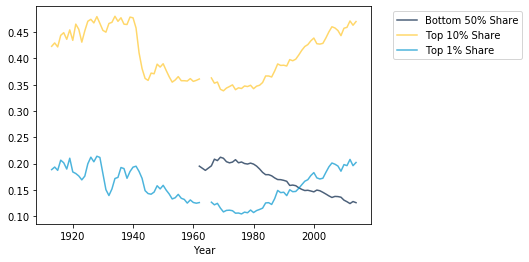

In [20]:
us_hist_joined.plot("Year")

This graph shows income inequality decreasing between 1910 and 1970 and increasing from 1970 to present. 

In 1913, Congress implemented the current income tax to promote equality. Originally meant to help compensate for revenue lost from reducing high tariffs, the new policy essentially made the top 1% start contributing to taxes. Additionally, the top marginal tax rate increased from 7% in 1913 to 73% in 1918, thus helping reduce income inequality. Right before the Great Depression, income inequality peaked, where the richest 1% possessing 19.6% of all income. During the Great Depression, top marginal tax rates increased up to 94% by 1944. The top marginal tax rate stayed high for decades, where it was 70% in 1965 and 50% in 1982. These high top marginal tax rates are correlated with low income inequality. During the Great Depression, the richest 1% had about 15% of total income. For the 10 years after the Great Depression, the top 1% had below 10% of total income and 8% for the 30 years afterwards. This period was known as the Great Compression. 

In the 1970s, the economy took a turn with high unemployment and inflation and low growth. In order to stimulate economic growth, the government reduced top marginal tax rates (went from 70% to 38.5% in 1980s), deregulated corporate institutions, and attacked labor union memberships (membership decreased by half within 30 years). Although these policies improved economic growth, it resulted in higher income inequality.

The graph below better shows that the share for the bottom 50% percentile steadily decreases, while the share for the top 1% share increases steadily. That means that the top 1% has more wealth than the entire bottom 50% of the population. Suppose a class of 100 people has an aggregate \\$100. In a world with perfect equality, each of the 100 people has \\$1 each. With this model, one person would have more wealth than 50 people combined. 

This trend that the top 1% has more wealth than the bottom 50% has been shown in the media too. [The Washington Post wrote a story last month](https://www.washingtonpost.com/business/2019/09/26/income-inequality-america-highest-its-been-since-census-started-tracking-it-data-show/) and found that “The number of families earning \\$15,000 or less has fallen since 2007, according to the latest census data, while the number of households bringing in \\$250,000 a year or more has grown more than 15 percent.” 

Can we conclude that high marginal tax lead to low income inequality but slow economic growth?

## The Rest of the World

Now let's examine the trends of income inequality in other parts of the world.

In [22]:
world_hist = Table.read_table("World_Inequality.csv")
bottom_50_world = world_hist.where("Percentile", "p0p50").drop("Percentile")
top_10_world = world_hist.where("Percentile", "p90p100").drop("Percentile")
top_1_world = world_hist.where("Percentile", "p99p100").drop("Percentile")

In [23]:
top_10_world

Year,Europe,World,Russia,China,USA,India,Brazil
1980,0.2846,0.4898,0.2102,0.2724,0.3424,0.315,nan
1981,0.283,0.4888,nan,0.2768,0.3472,0.3071,nan
1982,0.2819,0.4815,nan,0.2809,0.349,0.3005,nan
1983,0.2823,0.4893,nan,0.2819,0.3542,0.3528,nan
1984,0.2845,0.4916,nan,0.2867,0.3666,0.3338,nan
1985,0.2871,0.4971,0.2237,0.2952,0.3666,0.3479,nan
1986,0.2899,0.5008,nan,0.2987,0.3647,0.3507,nan
1987,0.2942,0.5043,nan,0.2974,0.3761,0.3447,nan
1988,0.2991,0.5078,0.2238,0.301,0.3895,0.3538,nan
1989,0.3024,0.5108,0.2372,0.3067,0.3867,0.3541,nan


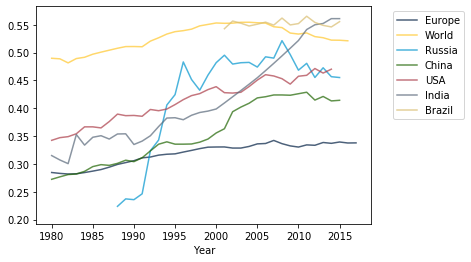

In [24]:
top_10_world.plot("Year")

What can we observe in this chart?

Just like the US, it seems like global inequality has been rising around the world: China, India, Russia, and also Europe. However, in absolute terms, the level of income inequality in Europe is much lower than that in the United States. 

Also look at Russia: income inequality spiked up around 1991. This is from the fall of the USSR: the failing Soviet state left the ownership of state assets contested, which allowed for informal deals with former USSR officials as a means to acquire state property. This led to the rise of many Russian oligarchs, those who rapidly accumulated wealth during the era of Russian privatization in the aftermath of the dissolution of the Soviet Union in the 1990s.

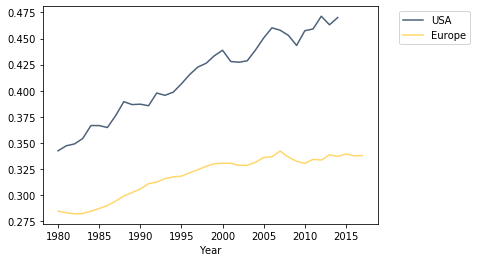

In [25]:
top_10_world.select("Year", "USA", "Europe").plot("Year")

##  The Elephant Graph

<img src="elephant_curve.jpg" width=500px></img>

The elephant curve is a graph that shows the real income growth per adult across each income group’s percentile around the world. There are 3 key features of the elephant curve: a hump for the world’s poorest, valley for the middle class, and trunk for the upper class. The thump is made of the world’s poorest countries, most likely made of people from developing countries. The valley is made of the working class from the developed world and upper class from developing countries. The trunk is made of people from the upper class from developed classes. The hump and valley indicate growth among emerging countries, and the top global 1%’s growth is higher than any other income group, thus explaining the positively sloped shape of the trunk. 


A study done by the [Brookings Institution](https://www.brookings.edu/research/whats-happening-to-the-world-income-distribution-the-elephant-chart-revisited/) found that “poorer countries, and the lower income groups within those countries, have grown most rapidly in the past 20 years.” This supports the World Bank’s claim that inequality between countries and within countries is decreasing. The Brookings Institution used only household surveys, however, which usually excludes the top and bottom percentile of the population, due to non-response bias. Still, the study is useful in corroborating the trends and growth in global income inequality. 